# Roving oddball

Here we will follow the methods section from [Canales-Johnson et al. (2021)](https://doi.org/10.1523/JNEUROSCI.0367-21.2021). I chose this because it's recent research, because it was one of the first hits on Scopus, and because it's open access. We will go over this section bit by bit and recreate the stimuli.

Here's the relevant section:

> "We adopted a roving oddball paradigm (Cowan et al., 1993; Haenschel et al., 2005; Garrido et al., 2008). The trains of 3, 5, or 11 repetitive single tones of 20 different frequencies (250–6727 Hz with intervals of one-quarter octave) were pseudorandomly presented. Tones were identical within each tone train but differed between tone trains (Fig. 1A). Because tone trains followed on from one another continuously, the first tone of a train was considered to be an unexpected deviant tone, because it was of a different frequency than that of the preceding train. The final tone was considered to be an expected standard tone because it was preceded by several repetitions of this same tone. To avoid analytical artifacts stemming from differences in the number of standard and deviant stimuli, we considered only the last tone of a train as standard. There were 240 changes from standard to deviant tones in a single recording session. Pure sinusoidal tones lasted 64 ms (7 ms rise/fall), and stimulus onset asynchrony was 503 ms. Stimulus presentation was controlled by MATLAB (MathWorks) using the Psychophysics Toolbox extensions (Brainard, 1997; Pelli, 1997; Kleiner et al., 2007). Tones were presented through two audio speakers (Fostex) with an average intensity of 60 dB SPL around the ear of the animal."

In [2]:
from thebeat.core import Sequence, Stimulus, StimSequence
import numpy as np

rng = np.random.default_rng(seed=123)

In [3]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

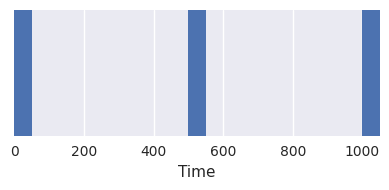

In [4]:
seq = Sequence.generate_isochronous(n=3, ioi=500)
seq.plot_sequence(figsize=(4, 2));

As you can see, the IOIs are the intervals *between* the events, meaning that for *n* events we have *n-1* IOIs.

If we were to join sequences like these together, the final sound of a sequence and the first sound of the next sequence would occur without interval between them. To fix this, we can use the ``metrical=True`` flag.

So let's create the sequences:

In [5]:
seq_3 = Sequence.generate_isochronous(n=3, ioi=503, metrical=True)
seq_5 = Sequence.generate_isochronous(n=5, ioi=503, metrical=True)
seq_11 = Sequence.generate_isochronous(n=11, ioi=503, metrical=True)
# And add them to a list we'll call sequences
sequences = [seq_3, seq_5, seq_11]

Now, these sequences look like this, and can thus be joined together later:

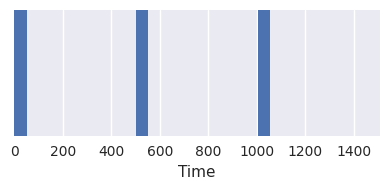

In [6]:
seq_3.plot_sequence(figsize=(4, 2));

In [7]:
# Make an array that contains the 20 frequencies we'll use. We'll use numpy.linspace for that.
freqs = np.linspace(start=250, stop=6727, num=20)
print(freqs)

[ 250.          590.89473684  931.78947368 1272.68421053 1613.57894737
 1954.47368421 2295.36842105 2636.26315789 2977.15789474 3318.05263158
 3658.94736842 3999.84210526 4340.73684211 4681.63157895 5022.52631579
 5363.42105263 5704.31578947 6045.21052632 6386.10526316 6727.        ]


In [8]:
# Loop over those frequencies, and create a list with generated Stimulus sound objects
stimuli = []
for freq in freqs:
    stim = Stimulus.generate(freq=freq, duration=64, onramp=7, offramp=7)
    stimuli.append(stim)

# We now have a list of Stimulus objects. Remember that they all have different frequencies
print(stimuli)

[Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0), Stimulus(duration_ms=64.0)]


We have 60 trials


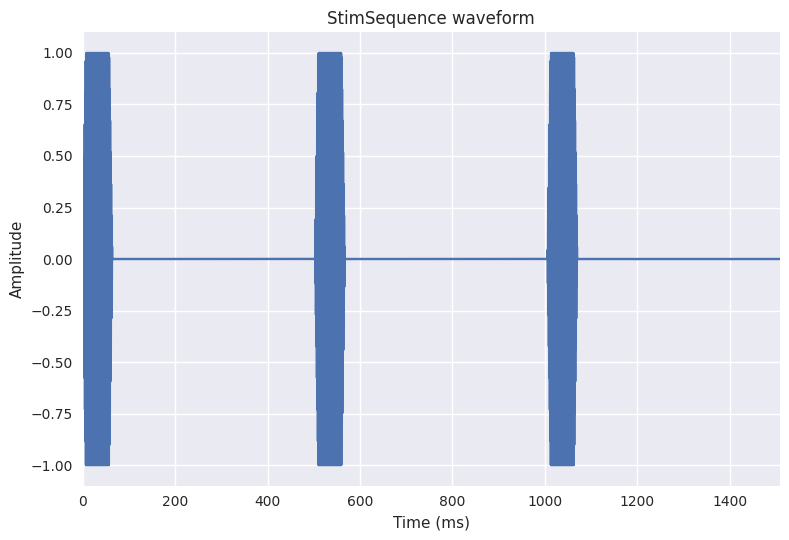

In [9]:
trials = []

for seq in sequences:
    for stim in stimuli:
        trial = StimSequence(stim, seq)
        trials.append(trial)

# Confirm there's 60:
print(f"We have {len(trials)} trials")

# Let's plot one of the trials to see what they look like:
trials[2].plot_waveform();

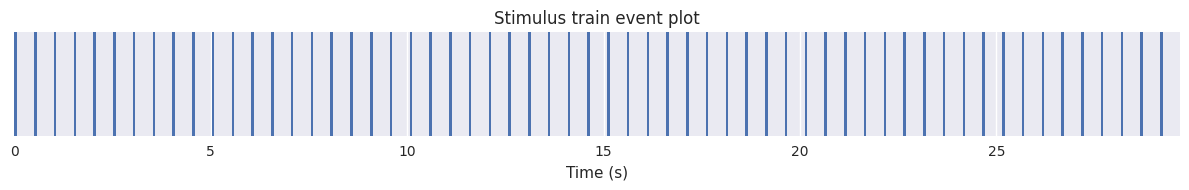

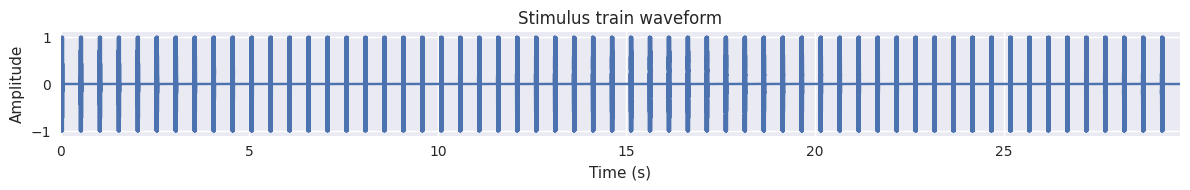

In [10]:
import thebeat.utils

# Shuffle the trials (we created the rng object all the way at the beginning of this tutorial)
rng.shuffle(trials)

# Create the train by joining the trials (only do the first ten)
train = thebeat.utils.join(trials[:9])

# Let's see what it looks like
train.plot_sequence(title="Stimulus train event plot", figsize=(12, 2));
train.plot_waveform(title="Stimulus train waveform", figsize=(12, 2));

# If you want, you can save the wav or play it (both of which we'll not do here)

#train.write_wav('train.wav')
#train.play()

In [13]:
# You can listen to the sound here. You can ignore this code, it's only for this website.
# In your Python editor you would simply use train.play()
from IPython.display import Audio
Audio(data=train.samples, rate=train.fs)

## Code summary

In [12]:
from thebeat.core import Sequence, Stimulus, StimSequence
import numpy as np

rng = np.random.default_rng(seed=123)

seq_3 = Sequence.generate_isochronous(n=3, ioi=503, metrical=True)
seq_5 = Sequence.generate_isochronous(n=5, ioi=503, metrical=True)
seq_11 = Sequence.generate_isochronous(n=11, ioi=503, metrical=True)
sequences = [seq_3, seq_5, seq_11]

freqs = np.linspace(start=250, stop=6727, num=20)

trials = []

for seq in sequences:
    for stim in stimuli:
        trial = StimSequence(stim, seq)
        trials.append(trial)

rng.shuffle(trials)

train = thebeat.utils.join(trials[:9])

#train.write_wav('train.wav')
#train.play()